<a href="https://colab.research.google.com/github/EDANHS/ADA-informes/blob/main/Informe4-BucketSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**1. Definición del problema.**
###**Problema de ordenamiento de una secuencia de números:**

Se requiere ordenar una secuencia de $n$ elementos dentro de una lista o arreglo. Para el siguiente caso, se aplica un algoritmo de distribución de elementos y luego se ordenan, para finalmente, concatenar resultados, para estos $n$ datos. 

El algoritmo recibe:

**$Entrada$** = Se espera como entrada un arreglo o una lista de $n$ datos, de modo que: $[a_1,a_2,a_3,...,a_n]$

**$Salida$** = El algoritmo devuelve una secuencia de $n$ elementos de la forma $[a_1',a_2',a_3',...,a_n']$, tal que, ${a_1'\leq a_2'\leq a_3' \leq...\leq a_n'}$ 


#2. Descripción del algoritmo.

## - BucketSort

A diferencia de los algoritmos clásicos de ordenamiento que realizan comparaciones para permutar sus elementos, BucketSort distribuye sus elementos en Buckets (cubos o celdas). Considerando que para un Bucket [i] que este en el arreglo B de n Buckets, este contendrá elementos en un rango [1/n * i ... 1/n * (i+1)]. Además, cada Bucket [i] contiene datos que son menores a los de otro Bucket [i+1], por tanto, los elementos del Bucket $B[1] < B[2] < ... B[n-1] < B[n]$.

La inserción de los datos en los Buckets se hace recorriendo la lista original y ubicando cada elemento A[i] en el Bucket B[n*A[i]].Luego una vez distribuidos los datos en buckets, puede que esten en un orden incorrecto, por lo que, se deben ordenar los datos en cada bucket mediante algún algoritmo de ordenamiento. Originalmente, BucketSort se implementó para ser ordenado con InsertionSort, puesto que se necesitaban listas enlazadas para guardar $m$ elementos y este algoritmo de ordenamiento permite ser implementado con listas enlazadas, este será el algoritmo a ocupar. Además, se debe tener en cuenta que el algoritmo original fue diseñado para elementos que están en una distribución de 0 a 1.

Finalmente, una vez tenemos los datos ordenados, debemos ir recorriendo el arreglo de $n$ sub-divisiones, e ir concatenando los elementos que hay en cada bucket, puesto que se irá iterando, desde el comienzo del arreglo, los elementos de cada bucket se irán juntando en orden de menor a mayor.

En el siguiente ejemplo se puede ver los pasos realizados:



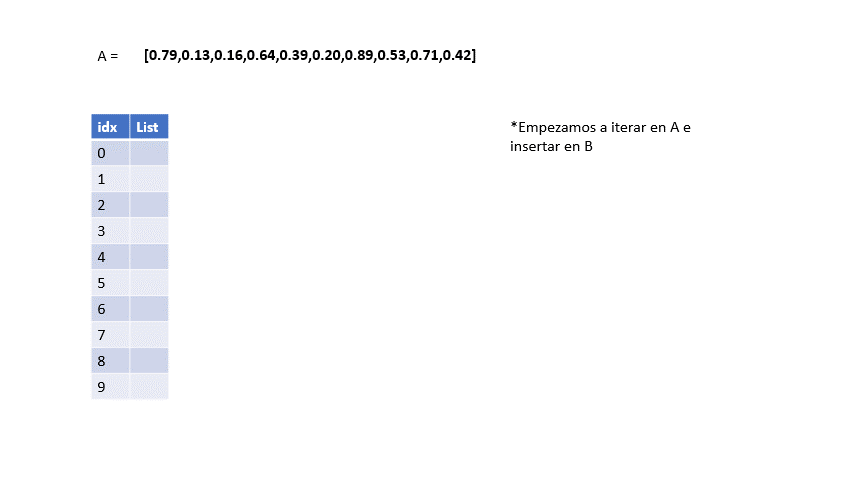

###                            [Imagen original]

## -En Resumen...

BucketSort realiza los siguientes pasos:

1. Distribuir sus datos uno a uno mediante asignación según el valor numérico a traspasar en un bucket.

2. Ordenar cada bucket, mediante un algoritmo de ordenamiento.

3. Concatenar los resultados de cada bucket y retornar el elemento.

# Datos a considerar en BucketSort:

* El algoritmo asume que su entrada es una distribución uniforme [0 : 1],  en consecuencia se espera que los elementos sean $0 \leq a[i] \leq 1$.

* Se generan buckets los cuales se espera que no tengan muchos números dentro a ordenar.

* Se requiere de un arreglo auxiliar para almacenar los buckets y los datos.

##-Ejemplo paso a paso

Para este caso consideraremos un arreglo de tamaño 5, los pasos a realizar son los siguientes:

$Entrada:$ A = [0.01, 0.17, 0.37, 0.67, 0.23]

1.Paso generar un arreglo de Buckets de A elementos e ir insertando cada elemento de A en B, mediante la asignación de B[(1/n)*A[i]].

* B = [---][---][---][---][---]  ; Generar un arreglo 5 Buckets

Primera iteración: B = [0.01][---][---][---][---]

Segunda iteración: B = [0.01,0.17][---][---][---][---]

Tercera iteración:
  B = [0.01,0.17][0.37][---][---][---]

Cuarta iteración:
  B = [0.01,0.17][0.37][---][0.67][---]

Quinta iteración:
  B = [0.01,0.17][0.37.0.23][---][0.67][---]
  
---
2.Ir ordenando cada Bucket con algún algoritmo de ordenamiento.

* Teniendo el arreglo de buckets B, se irá iterando cada celda de B y ordenando los elementos de dicha celda.

* B = [0.01,0.17][0.37.0.23][---][0.67][---]

Primera iteración: B = **[0.01,0.17]**[0.37.0.23][---][0.67][---] 

Segunda iteración: B = [0.01,0.17]**[0.37.0.23]**[---][0.67][---] **-Ordenar**

Tercera iteración: B = [0.01,0.17][0.23.0.37]**[---]**[0.67][---] 

Cuarta iteración: B = [0.01,0.17][0.23.0.37][---]**[0.67]**[---] 

Quinta iteración: B = [0.01,0.17][0.23.0.37][---][0.67]**[---]**

---
3.Con el arreglo ya ordenado, vamos juntando los resultados de los Buckets y reemplazando en A.

Primera iteración: B = [**0.01**,0.17][0.23.0.37][---][0.67][---] 

A = [**0.01**, 0.17, 0.37, 0.67, 0.23]

Segunda iteración: B = [0.01,**0.17**][0.23.0.37][---][0.67][---] 

A =[0.01, **0.17**, 0.37, 0.67, 0.23]

Tercera iteración: B = [0.01,0.17][**0.23**.0.37][---][0.67][---] 

A =[0.01, 0.17, **0.23**, 0.67, 0.23]

Cuarta iteración: B = [0.01,0.17][0.23,**0.37**][---][0.67][---] 

A =[0.01, 0.17, 0.23, **0.37**, 0.23]

Quinta iteración: B = [0.01,0.17][0.23.0.37][---][**0.67**][---]

A =[0.01, 0.17, 0.23, 0.37, **0.67**]

---
#####$Retorno$ = [0.01, 0.17, 0.23, 0.37, 0.67]



# Código

A continuación, se mostrará la implementación del algoritmo BucketSort. Para nuestra implementación consideramos el tamaño del arreglo de Buckets como el tamaño del arreglo de entrada A.

In [26]:
import random
from termcolor import colored

#####Funciones para imprimir

In [27]:
def imprimir1(B,n,k):
  print("[",end="")
  for i in range(n):
    print("[",end="")
    for j in range(len(B[i])):
      if k == B[i][j]:
        print(colored(B[i][j],"red"),end=" ")
      else:
        print(B[i][j],end=" ")
    print("]",end="")

  print("]")

In [28]:
def imprimir2(B,n,k):
  print("[",end="")
  for i in range(n):
    print("[",end="")
    if k == i:
      print(colored(B[i],"blue"),end=" ")
    else:
      print(colored(B[i],"green"),end=" ")
    print("]",end="")

  print("]")

In [29]:
def imprimir3(A,idx,B,i,j):
  print("Buckets: [",end="")
  for k in range(len(B)):
    print("[",end="")
    for p in range(len(B[k])):
      if k == i and p == j:
        print(colored(B[k][p],"red"),end=" ")
      else:
        print(B[k][p],end=" ")
    print("]",end="")
  print("]")
  print("Arreglo original: ",A[:idx],colored(A[idx:idx+1],"red"),A[idx+1:],"\n")

##### BucketSort + InsertionSort

In [30]:
def BucketSort(A,Verbose=False):
  n = len(A)
  B = []

  if Verbose == True:
    print(colored(("\nGenerando un arreglo de"),"cyan"),n,colored("Buckets...","cyan"))

  ###Generación de un arreglo de buckets
  for i in range(n):
    B.append([])
  
  if Verbose == True:
    print(B,end="\n\n")
    print((colored("Agregando elementos de A en los Buckets de B...","cyan")))
    
  ###Agregar los elementos de A en los buckets de B
  for i in range(n):
    B[int(n*A[i])].append(A[i])

    if Verbose == True:
      imprimir1(B,n,A[i])

  if Verbose == True:
    print(colored("\nOrdenando con InsertionSort...","cyan"))

  #Ordenamiento por Insertionsort
  for i in range(n):
    B[i] = InsertionSort(B[i],Verbose)

    if Verbose == True:
      imprimir2(B,n,i)

  if Verbose == True:
    print(colored("\nConcatenando resultados de B en A...","cyan"))

  ###Agrupación de los datos ordenados
  idx = 0
  for i in range(n):
    for j in range(len(B[i])):
      if Verbose == True:
        imprimir3(A,idx,B,i,j)
      A[idx] = B[i][j]
      idx+=1
  if Verbose == True:
    print("Arreglo de salida: ",colored((A),"cyan"))
  return A 

In [31]:
def InsertionSort(a,verbose=False):

    ## Inicializa una variable con el tamaño del arreglo
    n = len(a)
    if n == 0 or n == 1: return a
    for i in range(1,n):
      ## clave para realizar el intercambio
      key = a[i]

      ## Ciclo que va desde [i:0]
      for j in range(i-1,-1,-1):

        ## Realización del intercambio de la clave y ruptura
        ## del ciclo
        if a[j]<key:
          a[j+1] = key
          break
        ## Intercambio general
        a[j+1] = a[j]

      ## Intercambio general
      if key < a[0] : a[0] = key

    return a

## Ejemplo paso a paso (Verbose = True)

En la siguiente ejecución se mostrará los pasos realizados por el algoritmo BucketSort cuando la opción Verbose es igual a True, para el siguiente arreglo que tiene 10 elementos:

    A = [0.78,0.17,0.39,0.26,0.72,0.94,0.21,0.12]

In [32]:
A = [0.78,0.17,0.39,0.26,0.72,0.94,0.21,0.12]
print("Input: ", A,end="\n")
A = BucketSort(A,Verbose = True)
print("Output: ",A)

Input:  [0.78, 0.17, 0.39, 0.26, 0.72, 0.94, 0.21, 0.12]

Generando un arreglo de 8 Buckets...
[[], [], [], [], [], [], [], []]

Agregando elementos de A en los Buckets de B...
[[][][][][][][0.78 ][]]
[[][0.17 ][][][][][0.78 ][]]
[[][0.17 ][][0.39 ][][][0.78 ][]]
[[][0.17 ][0.26 ][0.39 ][][][0.78 ][]]
[[][0.17 ][0.26 ][0.39 ][][0.72 ][0.78 ][]]
[[][0.17 ][0.26 ][0.39 ][][0.72 ][0.78 ][0.94 ]]
[[][0.17 0.21 ][0.26 ][0.39 ][][0.72 ][0.78 ][0.94 ]]
[[0.12 ][0.17 0.21 ][0.26 ][0.39 ][][0.72 ][0.78 ][0.94 ]]

Ordenando con InsertionSort...
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] ]]
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] ]]
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] ]]
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] ]]
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] ]]
[[[0.12] ][[0.17, 0.21] ][[0.26] ][[0.39] ][[] ][[0.72] ][[0.78] ][[0.94] 

# 3. Correctitud

**Teorema de correctitud**

*El algoritmo **BucketSort** genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir,* $a_1'\leq a_2' \leq... \leq a_n'$.

En un arreglo A de n elementos:

1. Consideremos que para un Bucket [i] que esté en el arreglo B de n Buckets, este contendrá elementos en un rango [1/n * i ... 1/n * (i+1)]. Además, cada Bucket [i] contiene datos que son menores a los de otro Bucket [i+1], por tanto, los elementos del Bucket $B[1] < B[2] <... B[n-1] < B[n]$.

2. Para P(1), cuando hay un solo elemento en el Bucket [i], significa que no se deben ordenar elementos, por lo cual, este Bucket está ordenado.

3. Para P(m) elementos en un Bucket [i] con m < n que están repartidos en los Buckets, sabemos que InsertionSort ordena elementos con éxito generando un arreglo C  de la forma $[a_1',a_2',...a_n']$ y esto se probó con su propiedad invariante de bucle, en otra ocasión, por tanto, el Bucket [i], contendrá los mismos elementos ordenados de menor a mayor una vez se aplique InsertionSort.

4. Como anteriormente se mencionó, cada Bucket contiene elementos menores a los que contienen los Buckets posteriores, y cada Bucket contiene datos ordenados luego de aplicar InsertionSort, en consecuencia, se puede intuir que ya tenemos un arreglo B con los elementos de A ordenados de menor a mayor. Solo es necesario reemplazar los elementos de B en A desde 0 hasta n.

Dando como resultado que BucketSort es correcto.


# 4. Tiempo de ejecución

En la siguiente sección se hará un análisis del tiempo de ejecución para las complejidades del:

* Peor caso $O(n^2)$.
* Caso promedio $\varTheta(n)$.
* Mejor caso $O(n)$.

Para n elementos arbitrarios de un arreglo $A$. 

* Debemos recordar que para nuestra implementación se considera el tamaño del arreglo auxiliar de Buckets como n, igual al de A, si esto no fuera así se la complejidad en el caso medio y mejor caso sería $O(n+k)$ con k como número de buckets.


## 4.1 Peor caso

###*Teorema: El tiempo de ejecución para el peor caso se considera $O(n^2)$*

Para el análisis de este debemos recordar que se ocupa un algoritmo de ordenamiento por comparación, en este caso es InsertionSort y su peor caso es $O(n^2)$.

En BucketSort al distribuir sus elementos en sub-listas o  Buckets, puede suceder el caso donde todos los elementos de un arreglo de entrada A, caigan en el mismo Bucket y la complejidad recaería en el peor caso del algoritmo de ordenamiento ocupado (InsertionSort).

Algunas situaciones donde sucede esto:

* Elementos están en el mismo rango $1/n * i ... 1/n * (i+1) $.

* La lista es de un elemento $p$ el cual se repite $n$ veces.


## 4.2 Caso promedio

###*Teorema: El tiempo de ejecución para el peor caso se considera $\varTheta(n)$*

1.Primero, se debe tener en cuenta que el algoritmo realiza varios ciclos para ordenar un arreglo A de tamaño n, los cuales tienen las siguientes complejidades:
* Generar Buckets $O(n)$
* Distribución de datos $O(n)$
* Ordenamiento de datos [Cota superior $O(n^2)$ - Cota inferior $O(n)]$
* Concatenación $O(n)$.

Entonces se puede reducir a la expresión, donde se deben recorrer n veces un arreglo y la sumatoria del ordenamiento en los Buckets del arreglo auxiliar B, con el peor caso de  InsertionSort:


* $T(n) = \varTheta(n)+\displaystyle\sum_{i = 0}^{n-1} O(n^2_i)$ 



2.Para saber cuál es el caso promedio, debemos calcular el valor esperado en la fórmula anterior.

* $E[T(n)] = E[\varTheta(n)+\displaystyle\sum_{i = 0}^{n-1} O(n^2_i)]$

3.Por razonamiento, podemos deducir que el valor esperado para $\varTheta(n)$ es $\varTheta(n)$ y por las propiedades de la sumatoria se puede extraer la sumatoria para calcular solamente el valor esperado de $O(n^2)$:

* $E[T(n)] = \varTheta(n)+\displaystyle\sum_{i = 0}^{n-1}E[ O(n^2_i)]$

* $E[T(n)] = \varTheta(n)+\displaystyle\sum_{i = 0}^{n-1} O(E[n^2_i])$

* $E[n^2_i]$ es el valor esperado a calcular.

4.Teniendo en cuenta que cada elemento en un arreglo tiene una misma probabilidad de caer en el Bucket [i], se define una variable para este evento. 

* $X_ij$ = $I${La probabilidad de que un elemento A[j] caiga en el Bucket[i]}  
*$I$ como indicador de variable

5.Ahora, el valor i varía de $0$ a $n-1$ y j entre $1$ a $n$, dando que el valor:

* $n_i = \displaystyle\sum_{j = 1}^{n} X_ij$

6.Reemplazando la fórmula anterior en $E[n^2]$, obtenemos:

* $E[n_i^2] = E[(\displaystyle\sum_{j = 1}^{n} X_ij)^2]$

7.En él desarrollando la fórmula se aplican propiedades de la sumatoria para que tenga la siguiente forma:

* $E[n_i^2] = E[\displaystyle\sum_{j = 1}^{n}\displaystyle\sum_{k = 1}^{n} X_ij X_ik]$

8.Donde $X_ik$ el evento donde un elemento A[k] cae en el bucket[i].

* $E[n_i^2] = E[\displaystyle\sum_{j = 1}^{n}X_ij^2 + \displaystyle\sum_{1 \leq j \leq n}\displaystyle\sum_{1\leq k\leq n ; k\neq j}X_ij X_ik]$

* $E[n_i^2] = \displaystyle\sum_{j = 1}^{n}E[X_ij^2] + \displaystyle\sum_{1 \leq j \leq n}\displaystyle\sum_{1\leq k\leq n ; k\neq j}E[X_ij X_ik]$

9.Se deben evaluar valores para ambas sumatorias para obtener valores con los cuales trabajar. $X_ij$ es el evento de probabilidad $1/n$ de ocurrir y $1-1/n$ de no ocurrir. $X_ik$ es el resultado de la esperanza en $X_ij$, entonces:

* $E[X_ij^2] = 1^2 * (1/n) + 0^2*(1-1/n) => 1/n$
* $E[X_ij X_ik] = 1/n * 1/n => 1/n^2$

10.Al sustituir se pueden desarrollar las sumatorias obteniendo el tiempo de ejecución final.

* $E[n_i^2] = \displaystyle\sum_{j = 1}^{n}1/n + \displaystyle\sum_{1 \leq j \leq n}\displaystyle\sum_{1\leq k\leq n ; k\neq j}1/n^2$

* $E[n_i^2] = n*1/n + n*(n-1)*1/n^2$

* $E[n_i^2] = 2 - 1/n$

* $T(n) = \varTheta(n)+\displaystyle\sum_{i = 0}^{n-1} O(2-1/n)$ 

* $T(n) = \varTheta(n)+n* O(2-1/n)$ 

**Resultando que el tiempo medio para distribuciones uniformes es:** $\varTheta(n)$


##4.2 Mejor caso

###*Teorema: El tiempo de ejecución para el mejor caso se considera $O(n)$*
---
Se debe considerar que si un arreglo A de $n$ elementos genera un arreglo de Buckets de tamaño $m$ y $m < n$, nunca se podrá alcanzar el mejor caso, puesto que hay menos buckets en donde guardar elementos, por lo que, se irán agrupando elementos en los buckets, los cuales se deben ordenar. Teniendo en cuenta lo anterior, podemos intuir que el mejor tiempo de BucketSort se da cuando hay al menos suficientes buckets, para guardar como máximo un elemento o los menores elementos posibles, mejor dicho $m \geq n$, así el algoritmo que ordena no debe aplicarse y solamente se concatenan los resultados dando como resultado un tiempo de ejecución $O(n)$.


#5.Experimentos

###5.1 Comparación de algoritmos con complejidad lineal

Para estes primer experimento, se hará una comparación los entre los siguientes algoritmos de ordenamiento que poseen complejidad lineal:

* Bucketsort.
* RadixSort.
* CountingSort.

Se trabajara con números enteros que irán de 0 a 99, por lo que, se debe modificar la función de Bucketsort:

In [48]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

#### Algoritmo de ordenamiento en tiempo lineal (Extraidos de geeksforgeeks.com)

In [62]:
def countingSort(inputArray):
    # Find the maximum element in the inputArray
    maxElement= max(inputArray)

    countArrayLength = maxElement+1

    # Initialize the countArray with (max+1) zeros
    countArray = [0] * countArrayLength

    # Step 1 -> Traverse the inputArray and increase 
    # the corresponding count for every element by 1
    for el in inputArray: 
        countArray[el] += 1

    # Step 2 -> For each element in the countArray, 
    # sum up its value with the value of the previous 
    # element, and then store that value 
    # as the value of the current element
    for i in range(1, countArrayLength):
        countArray[i] += countArray[i-1] 

    # Step 3 -> Calculate element position
    # based on the countArray values
    outputArray = [0] * len(inputArray)
    i = len(inputArray) - 1
    while i >= 0:
        currentEl = inputArray[i]
        countArray[currentEl] -= 1
        newPosition = countArray[currentEl]
        outputArray[newPosition] = currentEl
        i -= 1

    return outputArray

In [56]:
def countSort(arr, exp1):
 
    n = len(arr)
 
    # The output array elements that will have sorted arr
    output = [0] * (n)
 
    # initialize count array as 0
    count = [0] * (10)
 
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = arr[i] // exp1
        count[index % 10] += 1
 
    # Change count[i] so that count[i] now contains actual
    # position of this digit in output array
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    # Build the output array
    i = n - 1
    while i >= 0:
        index = arr[i] // exp1
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]
 
def radixSort(arr):

    max1 = max(arr)
    exp = 1
    while max1 / exp >= 1:
        countSort(arr, exp)
        exp *= 10

In [210]:
def bucketSort(A):
  n = len(A)
  B = []
  k = max(A)
  ###Generación de un arreglo de buckets
  for i in range(k):
    B.append([])
  
 
  for i in range(n):
    B[int(A[i])-1].append(A[i])

  #Ordenamiento por Insertionsort
  for i in range(k):
    B[i] = InsertionSort(B[i])


  ###Agrupación de los datos ordenados
  idx = 0
  for i in range(k):
    for j in range(len(B[i])):
      A[idx] = B[i][j]
      idx+=1
  return A 

In [188]:
A = [78,17,39,26,72,94,21,12]
print("Input: ", A,end="\n")
A = bucketSort(A)
print("Output: ",A)

Input:  [78, 17, 39, 26, 72, 94, 21, 12]
Output:  [12, 17, 21, 26, 39, 72, 78, 94]


### Resultados esperados:

Se esperan que las curvas sean en tiempo lineal, según sus respectivas complejidades. Para este caso, se tuvo que adaptar BucketSort para números enteros, ya que este fue hecho para **decimales**.

### Gráficas

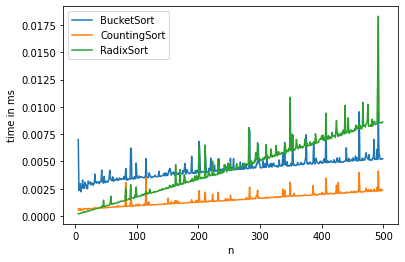

In [204]:
x=[]; y=[]; y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 500), n)
  b = a
  c = a
  
  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import countingSort", stmt=f"countingSort({b})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["BucketSort","CountingSort","RadixSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

En la gráfica, se puede apreciar que para distintos algoritmos de ordenamiento lineal, en un mismo arreglo aleatorio de 5 a 500 datos enteros, todos respetan sus respectivas complejidades. Respecto a quien logró tener un mejor tiempo de ordenamiento, se ve como CountingSort es mucho más eficiente para estas tareas. Por intuición se podria decir BucketSort y CountingSort son mejores para problemas de mayor tamaño, en cambio RadixSort no, esto se podria explicar porque realiza $d$ ordenamientos, y este valor depende de la cantidad de digitos que posea su máximo valor en el arreglo.


## 5.2 Comparación de algoritmos $O(n) - O(nlogn) - O(n^2)$

Para el siguiente experimento se realizará una comparación entre los distintos algoritmos ya estudiados, para ser especifico, tres de ellos:

* BucketSort
* MergeSort
* InsertionSort

Esto con la finalidad de demostrar la clara diferencia entre sus tiempos de ejecución, donde claro está, que BucketSort será el ganador.

#### Implementamos MergeSort

In [222]:
#Función MergeSort propuesta en la guía

def MergeSort(A, p, r,Verbose = False):
  if p>=r: return

  q = int((p+r)/2) #elemento medio del arreglo
  MergeSort(A,p,q,Verbose) #ordena la parte izquierda del arreglo
  MergeSort(A,q+1,r,Verbose) #ordena la parte derecha del arreglo
  Merge(A,p,q,r,Verbose) #combina y ordena ambos subarreglos ordenados

def Merge(A,p,q,r,Verbose=False):
  #Creo dos listas auxiliares
  A1 = A[p:q+1]
  A2 = A[q+1:r+1]
  #Indices para ir moviendose en ambas listas respectivamente
  izq = 0
  der = 0
  
  for i in range(p,r+1):

    ##Ciclos para rellenar valores faltantes en alguna lista
    if izq == len(A1):
      for k in range(i,r+1):
        A[k] = A2[der]
        der+=1
      break
    if der == len(A2):
      for k in range(i,r+1):
        A[k] = A1[izq]
        izq+=1
      break

    if A1[izq] <= A2[der]:
      A[i] = A1[izq]
      izq+=1
    else:
      A[i] = A2[der]
      der+=1


###Gráfica

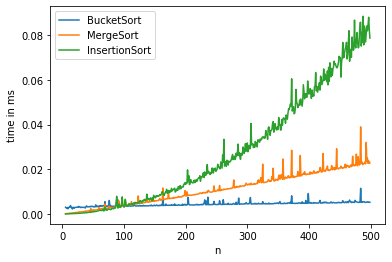

In [212]:
x=[]; y=[]; y1=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(1, 500), n)
  b = a
  c = a
  
  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({b},{0},{n-1},{False})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({c})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["BucketSort","MergeSort","InsertionSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

Según nuestra declaración inicial, BucketSort ordena con una gran eficacia en tiempo lineal el arreglo aleatorio de $n$ datos. Entre los intervalos de 0 a 100 aproximadamente, se puede ver como es superado por MergeSort e InsertionSort, esto se debe con certeza a su valor escogido para generar el arreglo de Buckets, puesto que este será el término mayor en el arreglo de entrada, entonces, si un arreglo de entrada es muy pequeño, pero tiene un valor muy grande, BucketSort crea un arreglo con muchas casillas para guardar pocos datos, pero este arreglo de buckets se debe recorrer igual, por lo que, se gasta mucho tiempo.


5.3 BucketSort implementado con InsertionSort vs MergeSort

En el siguiente Experimento se busca mostrar si hay alguna diferencia entre el tiempo de ejecución si se cambia el algoritmo de ordenamiento ocupado, en este caso, Python realizar esto.

Se compararán los siguientes algoritmos de ordenamiento que se usan para implementar BucketSort:
* InsertionSort.
* MergeSort.
* Sort [INCLUIDO EN PYTHON].

Se tiene la idea, de que si se implementa con algún otro método de ordenamiento, podría ser hasta más rápido que su implementación original, puesto que InsertionSort tiene peor caso $O(n^2)$, en cambio, MergeSort tiene tiempo $\varTheta(n)$. Los números que contendrán estos arreglos son en una distribución de 0 a 1.

#### BucketSort con MergeSort y Sort

In [215]:
def BucketSort1(A):
  n = len(A)
  B = []
  for i in range(n):
    B.append([])
  for i in range(n):
    B[int(n*A[i])].append(A[i])

  for i in range(n):
    MergeSort(B[i],0,len(B[i])-1)

  idx = 0
  for i in range(n):
    for j in range(len(B[i])):
      A[idx] = B[i][j]
      idx+=1
  return A 

In [216]:
def BucketSort2(A):
  n = len(A)
  B = []
  for i in range(n):
    B.append([])
  for i in range(n):
    B[int(n*A[i])].append(A[i])

  for i in range(n):
    B[i].sort()

  idx = 0
  for i in range(n):
    for j in range(len(B[i])):
      A[idx] = B[i][j]
      idx+=1
  return A 

####Gráfica

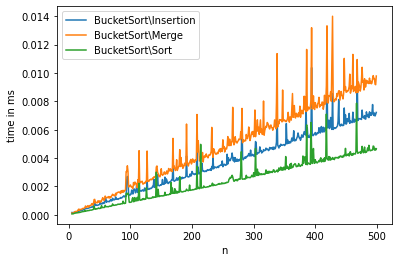

In [226]:
x=[]; y=[]; y1=[]; y2=[]

for n in range(5,500):

  a = [random.random() for i in range(n)]
  b = [random.random() for i in range(n)]
  c = [random.random() for i in range(n)]
  
  t = repeat(setup="from __main__ import BucketSort", stmt=f"BucketSort({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import BucketSort1", stmt=f"BucketSort1({b})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import BucketSort2", stmt=f"BucketSort2({c})", repeat=1, number=10)
  x.append(n)
  y.append(t)
  y1.append(t1)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["BucketSort\Insertion","BucketSort\Merge","BucketSort\Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Análisis de resultados

La incógnita a responder en este experimento era ver si con algún otro método de ordenamiento el algoritmo de BucketSort se volvía más rápido. Para el caso de MergeSort se puede ver que el tiempo de ordenamiento es peor que en InsertionSort, esto se da por el funcionamiento de cada algoritmo, quizá podría ser por la partición que realiza MergeSort para ordenar un arreglo, en cambio, con Insertionsort no pasa por esto, ya que directamente empieza a ordenar.

Algo curioso que solo se podría hacer en Python es implementar BucketSort con el método sort() que viene con el lenguaje, el experimento nos demostró que es más rápido en tiempo de ejecución, además que Python nos asegura que es estable, esto podría hacerse para algunos lenguajes que tengan implementado algún método de ordenamiento en su interior.


#5.Conclusión Final.


---

En la búsqueda de información se ha aprendido distintas cosas del algoritmo de ordenamiento BucketSort, hemos probado su correctitud, lo hemos implementado, visto su funcionamiento interno y realizamos experimentos con él. Se mostró su caso promedio que ordena en tiempo lineal, lo que es curioso debido a que ocupa un algoritmo que en su peor caso tiene tiempo $O(n^2)$, lo que nos da la idea de poder ocupar otros algoritmos que no sean muy eficientes para crear algo que si lo sea para algún problema específico, justo como lo hace este algoritmo. 

En conclusión, resulto ser un algoritmo interesante y muy útil para situaciones específicas, no servirá para casos generales, como QuickSort, MergeSort o InsertionSort, pero en su área resulta dominante.

